#**Neural Network**





Perceptrons is a function that maps its input "x," which is multiplied by the learned weight coefficient, and generates an output value "f(x)"
Perceptron is a single layer neural network and a multi-layer perceptron is called Neural Networks

###**Classifiers**

irises classes are:  ['setosa' 'versicolor' 'virginica']
The predict y-value is that is the iris type is  [1]


The predict y-value is that is the iris type is  [2]


Confusion Matrix is 
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


classification Report is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Confusion matrix, without normalization
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Normalized confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


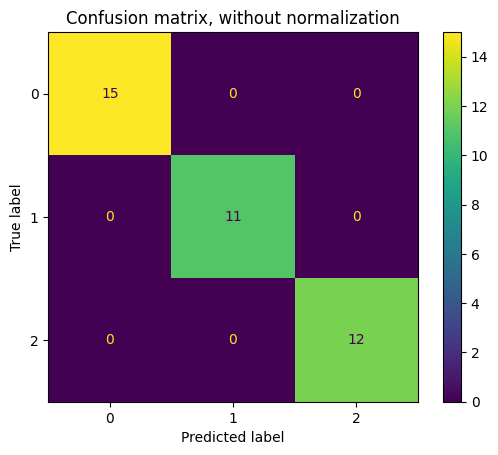

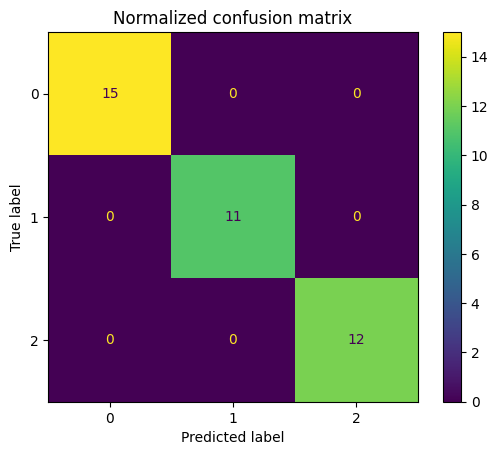

In [ ]:
#https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/
#Part 2 Vary the number of layers and perceptrons
#MLP Classifier for irises

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


irises = datasets.load_iris()
X = irises.data
y = irises.target
class_names = irises.target_names
print("irises classes are: ", class_names)


#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create an MLP model with 4 hidden layers with varying number of perceptrons in each layer, number of iterations is 2000
mlp_model = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000) # (2,5,7,9) = number of perceptrons per layer

#Fit the model
classifier = mlp_model.fit(X_train,y_train)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The order of the values are
#aligned to the order of the columns
new_input = [[5, 3.2, 1.2, 0.4]]
new_y = mlp_model.predict(new_input)
print("The predict y-value is that is the iris type is ", new_y)
print("\n")

new_input2 = [[7.8, 2.5, 6.5, 1.9]]
new_y2 = mlp_model.predict(new_input2)
print("The predict y-value is that is the iris type is ", new_y2)
print("\n")

#Prediction
y_pred = mlp_model.predict(X_test)

#Model Evaluation
#https://scikit-learn.org/stable/modules/model_evaluation.html
#clustering-metrics
print("Confusion Matrix is ")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("classification Report is ")
print(classification_report(y_test, y_pred))
print("\n")

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


Information about the number of records and columns  (178, 14)


Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl   

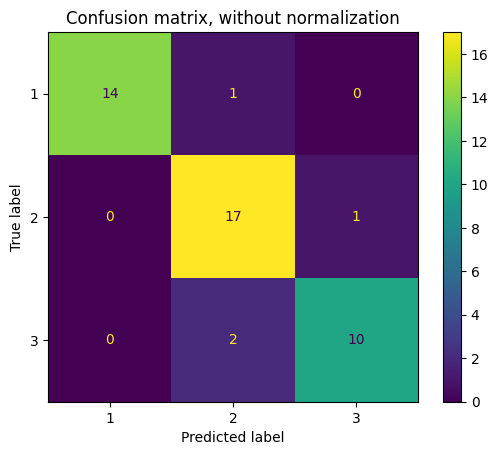

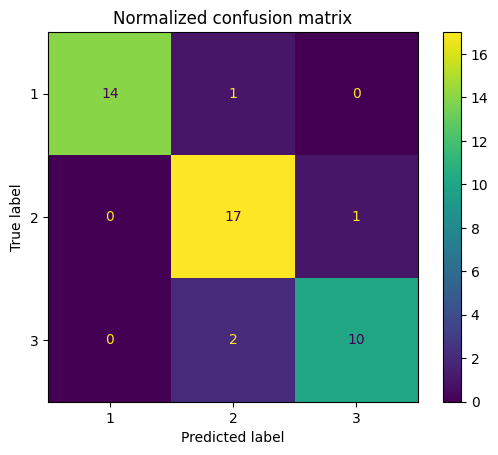

In [ ]:
#https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/
#Part 2 Vary the number of layers and perceptrons
#MLP Classifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

#Load dataset and explore dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week7/wine.txt', delimiter = ",")
print(dataset.head())
print("\n")
print("Information about the number of records and columns ",dataset.shape)
print("\n")
print(dataset.isnull().sum())
print("\n")
print(dataset.describe().transpose())
print("\n")

#Select all columns except for Wine type as predictors and Wine type as target variable; axis = 1 refers to columns
X = dataset.drop('Wine',axis=1)
y = dataset['Wine']

#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create an MLP-Model with 4 hidden layers with varying number of perceptrons in each #layer, number of iterations is 2000
mlp_model = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)

#Fit the model
classifier = mlp_model.fit(X_train,y_train)

#Prediction
y_pred = mlp_model.predict(X_test)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The #order of the values are
#aligned to the order of the columns
new_input = [[12, 2.2, 2.3, 19, 80, 1.5, 2.0, 0.2, 1.2, 1.2, 2.5, 1.4, 300]]
new_y = mlp_model.predict(new_input)
print("The predict y value is that is the wine type ", new_y)
print("\n")

#Model Evaluation
#https://scikit-learn.org/stable/modules/model_evaluation.html#clustering-metrics
print("Confusion Matrix is ")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("classification Report is ")
print(classification_report(y_test, y_pred))
print("\n")

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# print("=======================================================")
# print(len(mlp.coefs_))
# print(mlp.coefs_)
# print("\n")
# print("=======================================================")
# print(len(mlp.intercepts_))
# print(mlp.intercepts_)
# print("\n")


###**Regression**

In [ ]:
#MLP Regressor for Predictive Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Load dataset and explore dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week7/boston.txt', delimiter = ",")
print(dataset.head())
print("\n")
print("Information about the number of records and columns ",dataset.shape)
print("*****************************")
print(dataset.isnull().sum())
print("+++++++++++++++++++++++++++++")
print(dataset.describe())
print("-----------------------------")

#Select columns except for columns[3], [6],[10], and [11] as predictors and medv as target variable; axis = 1 refers to columns
X = dataset.drop(['chas', 'age', 'ptratio', 'b'], axis=1)
y = dataset['medv']
print(X)
print("============================")
print(y)
print("============================")

#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Build and fit the Neural Network MLP Regression Model
#Detailed explanation for all the parameters are here:
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
nn = MLPRegressor(hidden_layer_sizes=(3), activation='relu', max_iter = 500, solver='lbfgs')
nn_model = nn.fit(X_train, y_train)

#Use the NN model to predict the target values
#Prediction
y_pred = nn_model.predict(X_test)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The order of the values are
#aligned to the order of the columns
new_input = [[0.5, 12.0, 0.01, 0.55, 6.00, 3.5, 9.0, 10, 300, 13]]
new_y = nn_model.predict(new_input)
print("The predict y value is that is the Median Value x $1000 is ", new_y)
print("\n")

#Evaluation of the model
#https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
print("The mean squared error of the model is ", mean_squared_error(y_test, y_pred))
print("The mean absolute error of the model is ", mean_absolute_error(y_test, y_pred))
print("The R squared value of the model is ", r2_score(y_test, y_pred))
print("\n")

#Plot the scatterplots for x_test, y_test and y_pred values
#Cannot plot because the there are 10 predictors


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


Information about the number of records and columns  (506, 14)
*****************************
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
+++++++++++++++++++++++++++++
             crim          zn       indus        